In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 253MB/s]
100% 1.06G/1.06G [00:04<00:00, 241MB/s]


In [3]:
#unzip files
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
# Add a dummy input to the model to determine the shapes
import numpy as np
dummy_input = np.random.rand(1, 150, 150, 3)  # Create a dummy input with the same shape as your actual input
_ = conv_base.predict(dummy_input)  # Pass the dummy input through the conv_base model

model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



1/1 [==============================] - 0s 235ms/step


In [8]:
# Build the model with a defined input shape
model.build(input_shape=(None,150, 150, 3))  # 'None' allows for variable batch sizes

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
conv_base.trainable=False

In [10]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
  image=tensorflow.cast(image/255. ,tensorflow.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy'
                ,metrics=['accuracy'])

In [13]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 222s 352ms/step - loss: 0.2743 - accuracy: 0.8820 - val_loss: 0.2553 - val_accuracy: 0.8886
Epoch 2/10
625/625 [==============================] - 216s 345ms/step - loss: 0.1953 - accuracy: 0.9194 - val_loss: 0.2062 - val_accuracy: 0.9112
Epoch 3/10
625/625 [==============================] - 215s 344ms/step - loss: 0.1651 - accuracy: 0.9323 - val_loss: 0.2094 - val_accuracy: 0.9140
Epoch 4/10
625/625 [==============================] - 215s 343ms/step - loss: 0.1391 - accuracy: 0.9425 - val_loss: 0.2138 - val_accuracy: 0.9146
Epoch 5/10
625/625 [==============================] - 214s 343ms/step - loss: 0.1127 - accuracy: 0.9548 - val_loss: 0.3008 - val_accuracy: 0.8902
Epoch 6/10
625/625 [==============================] - 212s 339ms/step - loss: 0.0873 - accuracy: 0.9648 - val_loss: 0.2493 - val_accuracy: 0.9124
Epoch 7/10
625/625 [==============================] - 214s 343ms/step - loss: 0.0656 - accuracy: 0.9741 - val_loss: 0.2788 -

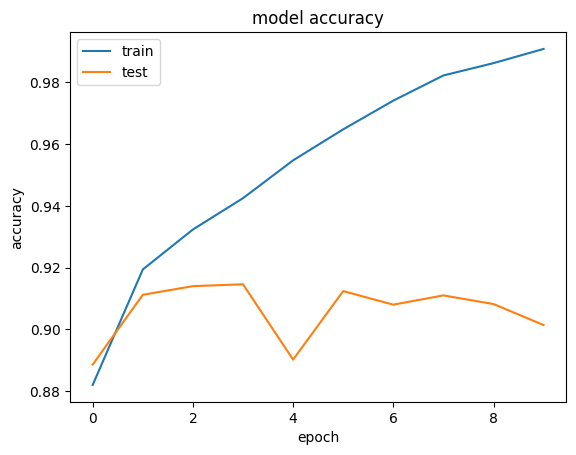

In [14]:
# plot train and test accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

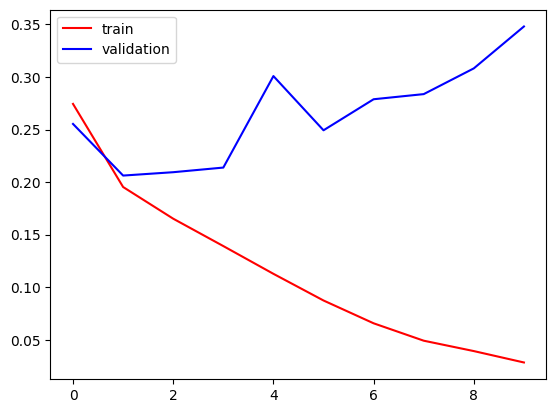

In [15]:
# val_loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()